In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 

In [4]:
! chmod 600 ~/.kaggle/kaggle.json 

In [5]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 99% 156M/158M [00:07<00:00, 25.2MB/s]
100% 158M/158M [00:07<00:00, 21.8MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close() 

In [7]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import os , cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras 
from keras.models import Sequential

In [28]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256) 
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [29]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [30]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization_16 (Bat  (None, 254, 254, 128)    512       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_17 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

In [32]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True
)

In [34]:
history = model.fit(train_ds,epochs=50,callbacks=[early_stopping],validation_data=validation_ds)

Epoch 1/50
8/8 [==============================] - 11s 724ms/step - loss: 1.0387 - accuracy: 0.7171 - val_loss: 1.0437 - val_accuracy: 0.4394
Epoch 2/50
8/8 [==============================] - 5s 291ms/step - loss: 0.2541 - accuracy: 0.9283 - val_loss: 0.8682 - val_accuracy: 0.6212
Epoch 3/50
8/8 [==============================] - 6s 295ms/step - loss: 0.1804 - accuracy: 0.9402 - val_loss: 0.8386 - val_accuracy: 0.6364
Epoch 4/50
8/8 [==============================] - 5s 287ms/step - loss: 0.0522 - accuracy: 0.9761 - val_loss: 1.0002 - val_accuracy: 0.5152
Epoch 5/50
8/8 [==============================] - 5s 288ms/step - loss: 0.0373 - accuracy: 0.9841 - val_loss: 1.6516 - val_accuracy: 0.3939
Epoch 6/50
8/8 [==============================] - 5s 288ms/step - loss: 0.0185 - accuracy: 0.9920 - val_loss: 2.4328 - val_accuracy: 0.3939
Epoch 7/50
8/8 [==============================] - 6s 397ms/step - loss: 0.0110 - accuracy: 0.9960 - val_loss: 3.0639 - val_accuracy: 0.3939
Epoch 8/50
8/8 [===

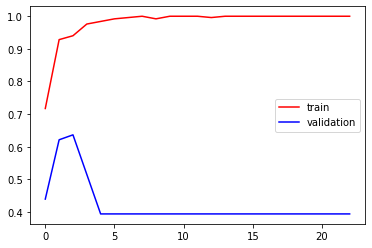

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

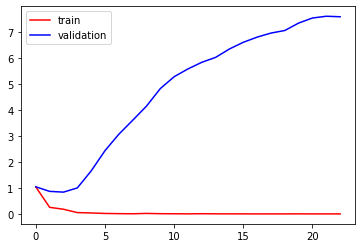

In [37]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_img.shape

(659, 651, 3)

In [ ]:
test_img_scale=cv2.resize(test_img,(256,256))

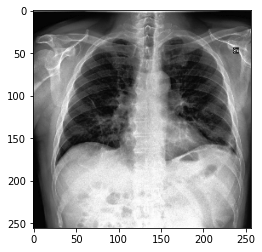

In [ ]:
plt.imshow(test_img_scale)

In [ ]:
test_input=test_img_scale.reshape((1,256,256,3))

In [ ]:
model.predict(test_input) 

1/1 [==============================] - 0s 17ms/step


array([[0., 1., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 14ms/step


1